This is a classification problem. The dataset names heart.csv is given. HeartDisease will be the target.

One thing you need to be careful: The dataset does not only consist of numeric values in this problem.

(i) Split dataset into training, validation, and test sets (60, 20, and 20 percent respectively)

(ii) Using training set, create classification models with Decision Tree Classifier for different values (from 1 to 25) of the minimum number of samples required to be at a leaf node (called the minimum number of leaf node observations in MATLAB). Using validation set, record accuracy for different values of minimum number of leaf node observations. Plot validation accuracy vs minimum number of leaf node observations curve.

(iii) What is the best value of minimum number of leaf node observations? What is test accuracy for the model with the best value of minimum number of leaf node observations? Plot confusion matrix.  

(iv) Change your target from HeartDisease to RestingECG, repeat (i),(ii), and (iii). Remember that RestingECG has 3 different values.

 Some helpful links are below: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html https://www.mathworks.com/help/stats/fitctree.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Convert text features to one hot encoding
def convertToOneHot(df, label):
    one_hot = pd.get_dummies(df[label],dtype=int)
    df = df.drop(label, axis=1)
    return df.join(one_hot)

# Calculate accuracy
def get_accuracy(x_train, y_train, x_val, y_val, min_leaf):
    model = DecisionTreeClassifier(min_samples_leaf=min_leaf)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_val)
    return accuracy_score(y_val, y_pred)

In [ ]:
# load data
df = pd.read_csv('heart.csv')
df_raw = df.copy()
print(df.shape)
df.head()

(918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# One-hot encoding for: Sex, ChestPainType. RestingECG, ExerciseAngina, ST_Slope
old_columns = df.columns
for column in old_columns:
  if df[column].dtype == "object":
    df = convertToOneHot(df, column)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,F,M,ASY,...,NAP,TA,LVH,Normal,ST,N,Y,Down,Flat,Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# Decision Tree classifier when target is Heart Disease

In [ ]:
target = "HeartDisease"

# splitting dataset into training, validation, and test sets (60%, 20%, and 20%, respectively)
x_train, x_dummy, y_train, y_dummy = train_test_split(df.drop(target, axis=1), df[target], test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_dummy, y_dummy, test_size=0.5, random_state=42)
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(734, 20) (734,)
(92, 20) (92,)
(92, 20) (92,)


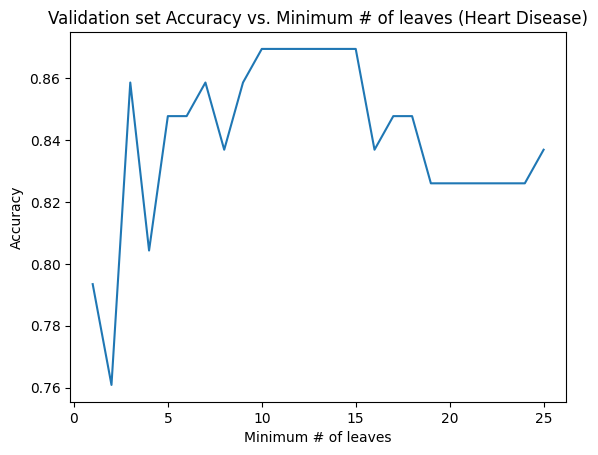

In [ ]:
scores = []

# find accuracy of model for each value of minimum # of leaves (1 to 25)
for i in range(1,26):
  scores.append(get_accuracy(x_train, y_train, x_val, y_val, i))

# Plotting accuracies vs min # of leaves for heart disease
plt.plot(range(1,26), scores)
plt.xlabel("Minimum # of leaves")
plt.ylabel("Accuracy")
plt.title("Validation set Accuracy vs. Minimum # of leaves (Heart Disease)")
plt.show()

In [ ]:
# Get best min # of leaves value and its score
best_min_samples_leaf = scores.index(max(scores)) + 1
y_pred = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf).fit(x_train, y_train).predict(x_test)
scoreOfBest = accuracy_score(y_test, y_pred)

# Print results
print("Best min_samples_leaf:", best_min_samples_leaf)
print("Accuracy of best min_simples_leaf on the test set:", scoreOfBest)

Best min_samples_leaf: 10
Accuracy of best min_simples_leaf on the test set: 0.8695652173913043


Confusion matrix (Heart Disease)


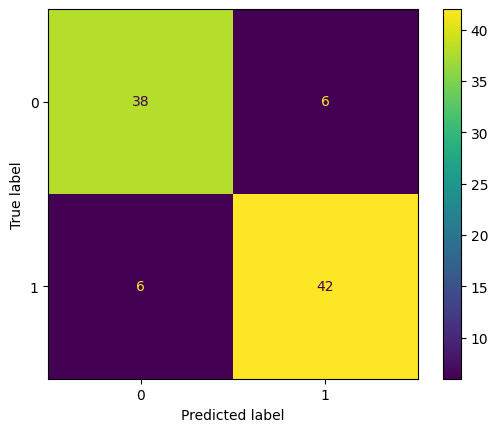

In [ ]:
# Confusion Matrix
print("Confusion matrix (Heart Disease)")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[0,1]).plot()

# Decision Tree classifer when target is Resting ECG

In [ ]:
# make copy of first dataframe
df2 = df_raw.copy()
classes = df2["RestingECG"].unique()

# adjusting dataframe target labels from text to numerical label
for i in range(len(classes)):
  df2.loc[df2["RestingECG"] == classes[i],"RestingECG"] = i
df2["RestingECG"] = df2["RestingECG"].astype(int)
df2["RestingECG"].unique()

array([0, 1, 2])

In [ ]:
# Saving old columns before preprocessing
old_columns = df2.columns

# Converitng text values to one hot encoding
for column in old_columns:
  if df2[column].dtype == "object":
    df2 = convertToOneHot(df2, column)

In [ ]:
target = "RestingECG"

# splitting dataset into training, validation, and test sets (60%, 20%, and 20%, respectively)
x_train, x_dummy, y_train, y_dummy = train_test_split(df2.drop(target, axis=1), df2[target], test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_dummy, y_dummy, test_size=0.5, random_state=42)

# Printing shapes
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(734, 18) (734,)
(92, 18) (92,)
(92, 18) (92,)


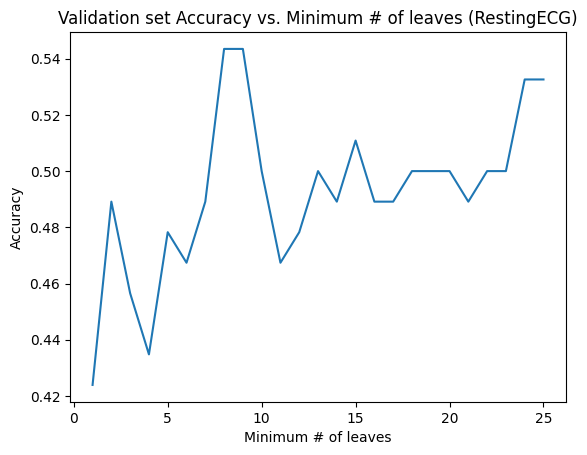

In [ ]:
scores = []

# Get scores for each min # of leaves value (1 to 25)
for i in range(1,26):
  scores.append(get_accuracy(x_train, y_train, x_val, y_val, i))

# plot results
plt.plot(range(1,26), scores)
plt.xlabel("Minimum # of leaves")
plt.ylabel("Accuracy")
plt.title("Validation set Accuracy vs. Minimum # of leaves (RestingECG)")
plt.show()

In [ ]:
# get best hyperparameter value and score
best_min_samples_leaf = scores.index(max(scores)) + 1
y_pred = DecisionTreeClassifier(min_samples_leaf=best_min_samples_leaf).fit(x_train, y_train).predict(x_test)
scoreOfBest = accuracy_score(y_test, y_pred)

# Print results
print("Best min_samples_leaf:", best_min_samples_leaf)
print("Accuracy of best min_simples_leaf on the test set:", scoreOfBest)

Best min_samples_leaf: 8
Accuracy of best min_simples_leaf on the test set: 0.6304347826086957


Confusion matrix (RestingECG)


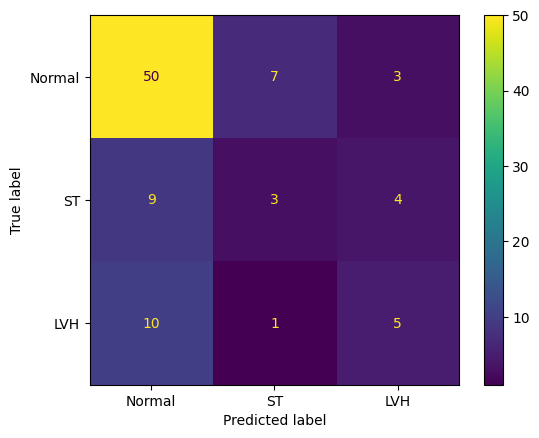

In [ ]:
# Confusion Matrix
print("Confusion matrix (RestingECG)")
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=classes).plot()